
# Dynamical System for time propagation of virus SARS-CoV-2 by J.P. Restrepo Cuartas#

Here we show a dynamical system to model the time propagation of virus SARS-CoV-2 (COVID-19) which is based on the SEIRV epidemiological model [for Wuhan, China](http://www.aimspress.com/article/10.3934/mbe.2020148)


The system is decribed with the following set of coupled non-linear differential equations


---

$$ \frac{dS}{dt} = \Lambda - 𝐷𝐹(𝑡−𝑡_0)\beta_E(E) E S - 𝐷𝐹(𝑡−𝑡_0)\beta_I(I) S I - 𝐷𝐹(𝑡−𝑡_0)\beta_V(V) S V - \mu S $$



$$ \frac{dE}{dt} =  𝐷𝐹(𝑡−𝑡_0)\beta_E(E) E S + 𝐷𝐹(𝑡−𝑡_0)\beta_I(I) S I + 𝐷𝐹(𝑡−𝑡_0)\beta_V(V) S V - (\alpha + \mu) E $$



$$ \frac{dI}{dt} = \alpha E - (\omega + \gamma + \mu) I $$



$$ \frac{dR}{dt} = \gamma I - \mu R $$


$$ \frac{dV}{dt} = \xi_1 E + \xi_2 I - \sigma V $$


where the susceptible (denoted by S ), the
exposed (denoted by E), the infected (denoted by I), and the recovered (denoted by R). Individuals
in the infected class have fully developed disease symptoms and can infect other people. Individuals in the
exposed class are in the incubation period; they do not show symptoms but are still capable of
infecting others. Thus, another interpretation of the E and I compartments in our model is that they
contain asymptomatic infected and symptomatic infected individuals, respectively.

[1] __Mathematical Biosciences and Engineering Volume 17, Issue 3, 2708–2724__

[2] ¿Por qué debemos quedarnos en casa? [Un análisis científico.](https://github.com/Camilo-HG/COVID-19) B. A. Rodríguez Rey, I. C. Hoyos Rincón, G. Machado Rodríguez, C. Hincapié Gutiérrez, N. Rivera Parra.


We consider the following __direct contact functions__ for the three transmission rates  $\beta$ $$ \beta_i(x) = \frac{\beta_{0i}}{1 + c x}  $$ where $\beta_{0E}$, $\beta_{0I}$ and ($\beta_{0V}$, fitting by data),all positive constants, denote the maximum values of these contact transmission rates,
and c (fitting by data) is a positive coefficient providing adjustment to the (otherwise constant) transmission rates. Once the maximun is reached, we use the following  deactivation function for the contact rates: $DF(t-t_0)=\frac{1}{2}+\frac{1}{2}\tanh(-\eta(t-t_0))$.

The __model's parameters__ are defined as follows

$\Lambda \ (\frac{person}{day}) = 14.882 \times 5 \times 10^4 \times \frac{1}{365} $: Influx rate. Source World Bank 2018.

$\mu \ (\frac{person}{day}) = \frac{5.562 \times 5 \times 10^4}{365} $: Natural death rate. Source World Bank 2018 about 5.503 per $10^3\,person$

$\alpha \ (\frac{1}{day})=\frac{1}{7}$: Incubation period.

$\omega \ (\frac{1}{day})= 5\times10^{-2} $: Disease-induced death rate.

$\gamma \ (\frac{1}{day})= \frac{1}{15} $: Recovery rate.

$\xi_2 \ (\frac{1}{day}) = \frac{1}{2}$: Virus shedding rate by infected people

$\xi_1 \ (\frac{1}{day}) = 5$  Virus shedding rate by exposed people.

$\sigma \ (\frac{1}{day}) $  fitting by data: Removal rate of virus from environment.

In [ ]:
##=== Import Libraries ===##
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import integrate, optimize
from scipy.ndimage.interpolation import shift
import glob, pytz
from datetime import date, timedelta
#from google.colab import drive
#drive.mount('/content/drive')

Populating the interactive namespace from numpy and matplotlib


<ipython-input-1-8d1b26a9bad7>:7: DeprecationWarning: Please use `shift` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import shift


In [ ]:
##=== Data  ===##
#Confirmed cases
df_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
#Death cases
df_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
#Recovered cases
df_recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
FIX_DATA=True
if FIX_DATA:
    ic = df_confirmed[df_confirmed['Country/Region']=='Colombia'].index[0]
    df_confirmed.loc[ic,'4/18/20']=3621
    ic1 = df_deaths[df_deaths['Country/Region']=='Colombia'].index[0]
    df_deaths.loc[ic1,'4/18/20']=166
    ic2 = df_recovered[df_recovered['Country/Region']=='Colombia'].index[0]
    df_recovered.loc[ic2,'4/18/20']=691
    ic = df_confirmed[df_confirmed['Country/Region']=='Colombia'].index[0]
    df_confirmed.loc[ic,'5/28/20']=25366
    ic2 = df_recovered[df_recovered['Country/Region']=='Colombia'].index[0]
    df_recovered.loc[ic2,'5/28/20']=6665

In [ ]:
###=== Data  ===###
def cases(dfp, ctry):
    df = dfp.groupby("Country/Region").sum()
    df.drop(['Lat', 'Long'], axis=1, inplace=True)

    Cases = df.loc[ctry][df.loc[ctry] > 0]

    num = len(Cases)
    X = np.arange(0, num)
    Y = df.loc[ctry][-num:]

    print(df.loc[ctry][-1:])

    return Y

In [ ]:
##=== Data for any Country ===##
ctry='Colombia'
data1 = cases(df_confirmed, ctry)
data2 = cases(df_deaths, ctry)
data3 = cases(df_recovered, ctry)
xtot = np.array([i for i in range(len(data1))])
if  len(data1) != len(data2) or len(data1) != len(data3):
    if  len(data1) != len(data2):
        deaths=np.array([0 for i in range(len(data1)-len(data2))]+[data2[i] for i in range(len(data2))])
    else:
        deaths = data2
    if  len(data1) != len(data3):
        rec = np.array([0 for i in range(len(data1)-len(data3))]+[data3[i] for i in range(len(data3))])
    else:
        rec=data3
    inf=np.array([data1[i] for i in range(len(data1))])-rec-deaths
else:
    inf = data1-data2-data3
    rec = data3
    deaths = data2

3/9/23    6359093
Name: Colombia, dtype: int64
3/9/23    142339
Name: Colombia, dtype: int64
3/9/23    0
Name: Colombia, dtype: int64


<ipython-input-3-cc00bdeca3ae>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = dfp.groupby("Country/Region").sum()
<ipython-input-3-cc00bdeca3ae>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = dfp.groupby("Country/Region").sum()
<ipython-input-3-cc00bdeca3ae>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = dfp.groupby("Country/Region").sum()


In [ ]:
len(np.array(data1))

1099

In [ ]:
#data1 = np.append(data1,513719)
#rec = np.append(rec,339124)
#deaths = np.append(deaths,16183)
#inf = np.append(inf,513719-339183-16183)
#xtot = np.append(xtot,len(xtot))

In [ ]:
#data1=data1[100:]
#rec=rec[100:]
#deaths=deaths[100:]
#inf=inf[100:]
#xtot=xtot[:-100]
#rec=(rec+0.7*rec).round()
#inf=(inf+0.7*inf).round()
#deaths=(deaths+0.7*deaths).round()
#data1=(data1+0.7*data1).round()

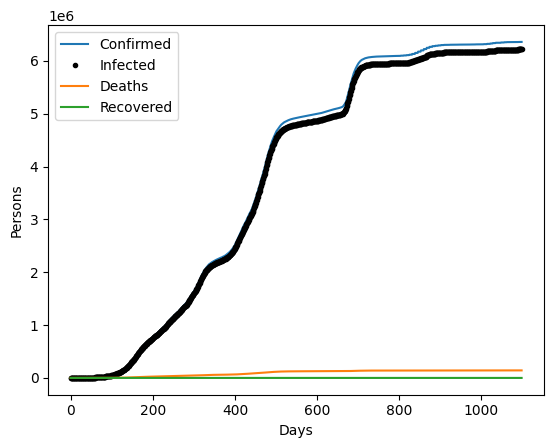

In [ ]:
# --- show ---
plt.plot(xtot, data1,'-',xtot, inf,'.k',xtot, deaths,'-',xtot, rec,'-')
plt.legend(('Confirmed','Infected',"Deaths","Recovered"),loc=0)
plt.xlabel("Days")
plt.ylabel("Persons")
plt.yscale("linear")
plt.show()

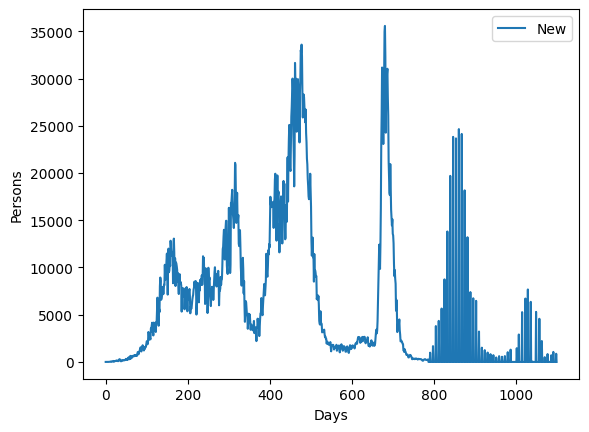

In [ ]:
plt.plot(xtot, data1-shift(data1,1,cval=0),'-')
plt.legend(('New',),loc=0)
plt.xlabel("Days")
plt.ylabel("Persons")
plt.yscale("linear")
plt.show()

In [ ]:
# --- Class for optimizing the model ---

class Covid19_ODE():
    def __init__(self):
        self.y = inf[:]
        self.y1 = rec[:]
        self.X = np.linspace(0,len(self.y),len(self.y))
        ###################################################################################################
        self.lbd =(14.882*5*10**4) / 365        #Influx rate. Source World Bank 2018.
        self.b0 = [3.08*pow(10, -10), 0.22*pow(10, -9)]
        self.mu = (5.562*5*10**4) / (5* pow(10,6) *365)      #Natural death rate. Source World Bank 2018
        self.alpha = 1/7      #Incubation period
        self.omega =2.8*pow(10,-2)      #Disease-induced death rate.
        self.gamma = 1/28 #Recovery rate.
        self.xi_1 = 2.5     #Virus shedding rate by exposed  people.
        self.xi_2 = 0.25   #Virus shedding rate by infected people.
        self.eta = 0.07
        self.sigma = 0.015125
        self.cc = 0.11656206*pow(10, -5)



        #Wuhan's initial condition
        self.sys0_w = [8998505, 1000, 475, 10, 10000]


    #def sys0_n(self,n): return [n, inf[0]-3000, inf[0], rec[0], 20000] #Initial conditions for n inhabitants

    def sys0_n(self,n): return [n, 30, 10, -30, 400] #Initial conditions for n inhabitants

    def smoothstep(self,X,X0,eta): return 0.5 + 0.5*np.tanh(-eta*(X-X0))

    def syst(self, y, X, p):
        ''' System of ODEs for modeling the Pandemic: Input: y - state vector (list);
        X - time ; p: parameters
        Output: list with the differential variation of y in a given time X
        '''
        S, E, I, R, V = y
        X0 = 1800
        eta1=self.eta
        dS = self.lbd - self.smoothstep(X,X0,eta1)*(self.b0[0] / (1 + self.cc*E))*E*S - self.smoothstep(X,X0,eta1)*(p[0]/ (1 + self.cc*I))*S*I - self.smoothstep(X,X0,eta1)*(self.b0[1] / (1 + self.cc*V))*S*V - self.mu*S
        dE = self.smoothstep(X,X0,eta1)*(self.b0[0] / (1 + self.cc*E))*E*S +self.smoothstep(X,X0,eta1)*(p[0]/ (1 + self.cc*I))*S*I + self.smoothstep(X,X0,eta1)*(self.b0[1]/ (1 + self.cc*V))*S*V - (self.alpha + self.mu)*E
        dI = self.alpha*E - (self.omega + p[1] + self.mu)*I
        dR = p[1]*I - self.mu*R
        dV = self.xi_1*E + self.xi_2*I - self.sigma*V

        return [dS, dE, dI, dR, dV]

    def model_sys(self, X, p):##=== solving ode system ===###
        return integrate.odeint(self.syst, self.sys0_n(5*10**7), X, args=(p,))###self.sys0_n(5*10**7)

    def f_resid_sys(self, p):
        return  np.abs(self.y - self.model_sys(self.X, p)[:,2])**2+np.abs(self.y1 - self.model_sys(self.X, p)[:,3])**2

    def optim_sys(self, p_quess):
        return optimize.leastsq(self.f_resid_sys, p_guess) # fit params

In [ ]:
po = Covid19_ODE()
#p_guess = [3.32087254*pow(10, -11), 1.1121*pow(10, -4)] ##Colombia
p_guess = [8.25656206*pow(10, -11),1/30]
c, kvg = po.optim_sys(p_guess)
print("parameter values are ",c, kvg)
xmaxd = 400
x = np.linspace(0,xmaxd,2000)

<ipython-input-10-4454cbd4ff27>:53: RuntimeWarning: overflow encountered in square
  return  np.abs(self.y - self.model_sys(self.X, p)[:,2])**2+np.abs(self.y1 - self.model_sys(self.X, p)[:,3])**2


parameter values are  [ 1.78663520e-09 -1.97027133e-04] 1


In [ ]:
print("days to recovery",round(1/c[1]),"--- days to death",round(1/po.omega))

days to recovery -5075 --- days to death 36


In [ ]:
shift1 = 0
shift2 = 0
abyd = ((po.model_sys(x, c)[:,2]+shift(po.model_sys(x, c)[:,3],shift1,cval=0)).clip(min=0) \
      -shift(po.model_sys(x, c)[:,2]+shift(po.model_sys(x, c)[:,3],shift1,cval=0),1,cval=0).clip(min=0)).clip(min=0)
totta = np.array([np.sum(abyd[:i]).round() for i in range(len(abyd))])
td=len(xtot)
dt = datetime.datetime.now(pytz.timezone('America/Bogota'))
initialdt = datetime.datetime(2020, 3, 6)
finaldt = initialdt+ datetime.timedelta(days=xmaxd)
lims = [(np.datetime64(initialdt.strftime("%Y-%m-%d")),np.datetime64(finaldt.strftime("%Y-%m-%d")))]
posmax = np.argmax(po.model_sys(x, c)[:,2])
posmaxtot = np.argmax(totta)
numdatemax = int(x[posmax])
maxinf = po.model_sys(x, c)[:,2][posmax]
maxtot = (totta)[posmax]
finalmaxtot = (totta)[posmaxtot]
delta = numdatemax-td
datemax = dt+ datetime.timedelta(days=delta)
dt1 = dt.strftime("%m/%d/%Y")
dt2 = datemax.strftime("%m/%d/%Y")
dt3 = dt.strftime("%m_%d_%Y_%H_%M_%S")
R1 = (po.b0[0]*5*10**7)/(po.alpha+po.mu)
R2 = (po.alpha*c[0]*5*10**7)/((po.omega+po.gamma+po.mu)*(po.alpha+po.mu))
R3 = (((po.omega+po.gamma+po.mu)*po.xi_1+po.alpha*po.xi_2)*po.b0[1]*5*10**7)/(po.sigma*(po.omega+po.gamma+po.mu)*(po.alpha+po.mu))
R0 = (R1+R2+R3)
print(delta)
print("R0= ", R0,", R1= ", R1,", R2= ", R2,", R3= " ,R3)

-869
R0=  17.062435077219565 , R1=  0.10768513389033188 , R2=  1.3972322944198832 , R3=  15.55751764890935


<ipython-input-14-cdcd02b548bb>:33: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale("log")


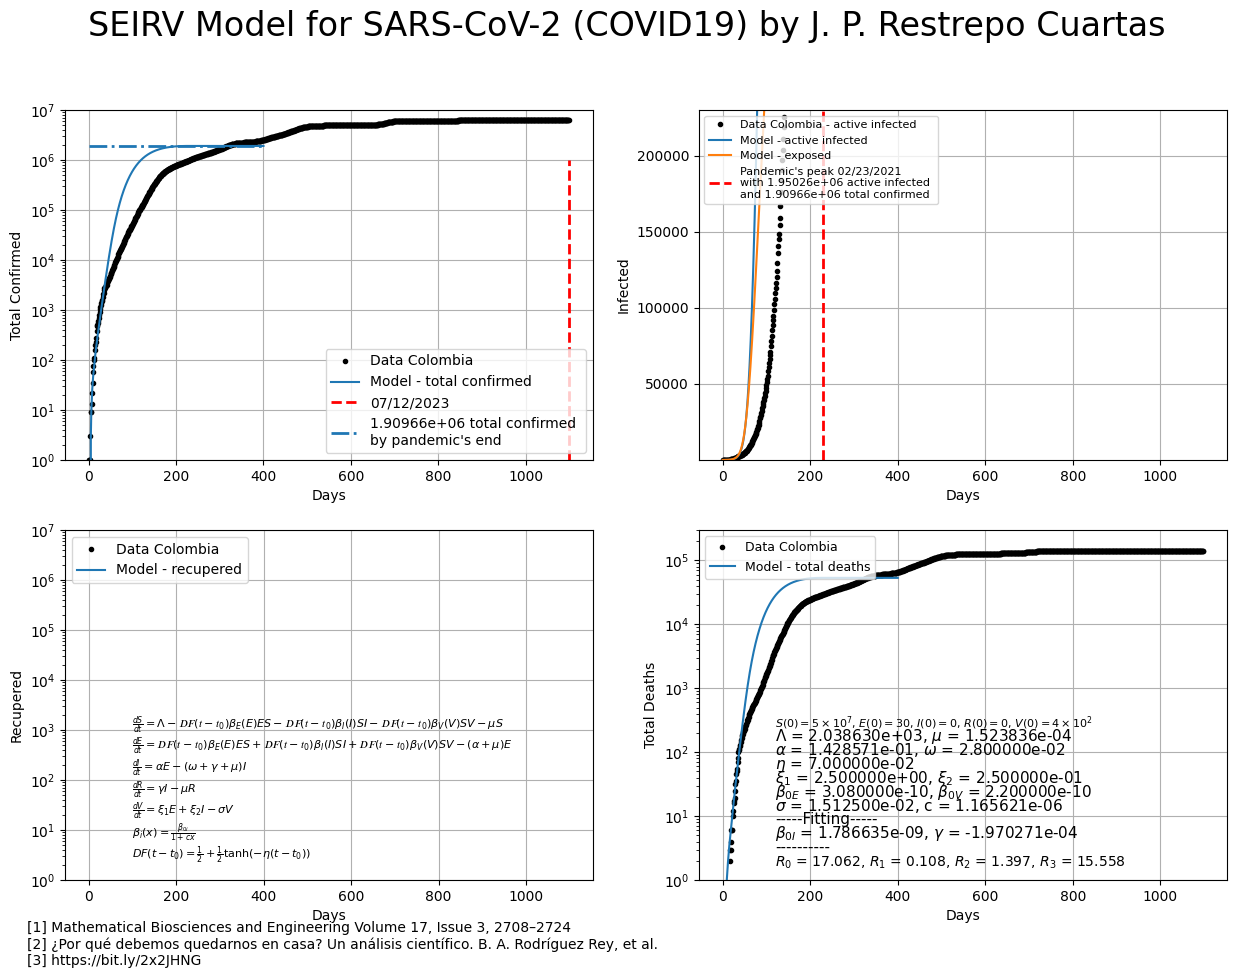

In [ ]:
# --- show ---
fig = plt.figure(figsize=(15,10))
fig.suptitle('SEIRV Model for SARS-CoV-2 (COVID19) by J. P. Restrepo Cuartas', fontsize=24)
fig.text(0.1,0.025,'[1] Mathematical Biosciences and Engineering Volume 17, Issue 3, 2708–2724 \
    \n[2] ¿Por qué debemos quedarnos en casa? Un análisis científico. B. A. Rodríguez Rey, et al. \
    \n[3] https://bit.ly/2x2JHNG ')
plt.subplot(221)
plt.plot(xtot[:],data1[:],'.k',x, totta)
plt.yscale("log")
plt.vlines(td,1,10**6,linestyles='--',colors='r',lw=2)
plt.hlines(finalmaxtot,0,xmaxd,linestyles='dashdot',lw=2)
#plt.vlines(40,1,10**4,linestyles='--',colors='b',lw=2)
plt.legend(("Data "+ctry,'Model - total confirmed',dt1,'%g total confirmed \nby pandemic\'s end'
            %(finalmaxtot.round()),"''Smart'' day"),loc=0)
plt.xlabel("Days")
plt.ylabel("Total Confirmed")
plt.ylim(1,10**7)
plt.grid()
plt.subplot(222)
plt.plot(xtot[:], inf[:],'.k',x, po.model_sys(x, c)[:,2],'-',x, po.model_sys(x, c)[:,1],'-')
plt.vlines(numdatemax,1,10**6,linestyles='--',colors='r',lw=2)
#plt.vlines(40,1,10**6,linestyles='--',colors='b',lw=2)
plt.legend(("Data "+ctry+' - active infected','Model - active infected',
            'Model - exposed','Pandemic\'s peak '+dt2+'\nwith %g active infected \nand %g total confirmed'
            %(maxinf.round(),maxtot.round())),loc='upper left',fontsize=8)
plt.xlabel("Days")
plt.ylabel("Infected")
plt.ylim(1,2.3*10**5)
plt.yscale("linear")
plt.grid()
plt.subplot(223)
plt.plot(xtot[:],rec[:],'.k',x, shift(po.model_sys(x, c)[:,3],shift1,cval=0))
plt.yscale("log")
plt.legend(("Data "+ctry,'Model - recupered'),loc='upper left')
plt.xlabel("Days")
plt.ylabel("Recupered")
plt.text(xmaxd*0.25, np.exp(7), r'$\frac{dS}{dt} = \Lambda - 𝐷𝐹(𝑡−𝑡_0)\beta_E(E) E S - 𝐷𝐹(𝑡−𝑡_0)\beta_I(I) S I - 𝐷𝐹(𝑡−𝑡_0)\beta_V(V) S V - \mu S$',fontsize=8)
plt.text(xmaxd*0.25, np.exp(6), r'$\frac{dE}{dt} =  𝐷𝐹(𝑡−𝑡_0)\beta_E(E) E S + 𝐷𝐹(𝑡−𝑡_0)\beta_I(I) S I + 𝐷𝐹(𝑡−𝑡_0)\beta_V(V) S V - (\alpha + \mu) E $',fontsize=8)
plt.text(xmaxd*0.25, np.exp(5),r'$\frac{dI}{dt} = \alpha E - (\omega + \gamma + \mu) I $',fontsize=8)
plt.text(xmaxd*0.25, np.exp(4),r'$\frac{dR}{dt} = \gamma I - \mu R$',fontsize=8)
plt.text(xmaxd*0.25, np.exp(3),r'$\frac{dV}{dt} =\xi_1 E + \xi_2 I - \sigma V$',fontsize=8)
plt.text(xmaxd*0.25, np.exp(2),r'$ \beta_i(x) = \frac{\beta_{0i}}{1 + c x}  $',fontsize=8)
plt.text(xmaxd*0.25, np.exp(1),r'$DF(t-t_0)=\frac{1}{2}+\frac{1}{2}\tanh(-\eta(t-t_0))$',fontsize=8)
plt.ylim(1,10**7)
plt.grid()
plt.subplot(224)
plt.plot(xtot[:],deaths[:],'.k',x, po.omega*totta)
plt.yscale("log")
plt.legend(("Data "+ctry,'Model - total deaths'),loc='upper left',fontsize=9)
plt.xlabel("Days")
plt.ylabel("Total Deaths")
plt.ylim(1,0.3*10**6)
plt.text(xmaxd*0.3, np.exp(5.5), r'$S(0)=5\times10^7$, $E(0)=30$, $I(0)=0$, $R(0)=0$, $V(0)=4\times10^2$',fontsize=8)
plt.text(xmaxd*0.3, np.exp(5), r'$\Lambda$ = %e, $\mu$ = %e'%(po.lbd,po.mu),fontsize=11)
plt.text(xmaxd*0.3, np.exp(4.5), r'$\alpha$ = %e, $\omega$ = %e'%(po.alpha,po.omega),fontsize=11)
plt.text(xmaxd*0.3, np.exp(4), r'$\eta$ = %e'%(po.eta),fontsize=11)
plt.text(xmaxd*0.3, np.exp(3.5), r'$\xi_1$ = %e, $\xi_2$ = %e'%(po.xi_1,po.xi_2),fontsize=11)
plt.text(xmaxd*0.3, np.exp(3), r'$\beta_{0E}$ = %e, $\beta_{0V}$ = %e'%(po.b0[0],po.b0[1]),fontsize=11)
plt.text(xmaxd*0.3, np.exp(2.5), r'$\sigma$ = %e, c = %e'%(po.sigma,po.cc),fontsize=11)
plt.text(xmaxd*0.3, np.exp(2), r'-----Fitting-----',fontsize=11)
plt.text(xmaxd*0.3, np.exp(1.5), r'$\beta_{0I}$ = %e, $\gamma$ = %e'%(c[0],c[1]),fontsize=11)
plt.text(xmaxd*0.3, np.exp(1), r'----------',fontsize=11)
plt.text(xmaxd*0.3, np.exp(0.5), r'$R_0$ = %0.3f, $R_1$ = %0.3f, $R_2$ = %0.3f, $R_3$ = %0.3f'%(R0,R1,R2,R3),fontsize=10)
plt.grid()
#plt.savefig('/content/drive/My Drive/SARSCoV2/modelsiervcovid19_'+dt3+'_jprestrepocuartas.pdf', format='pdf', dpi=1200)
plt.show()

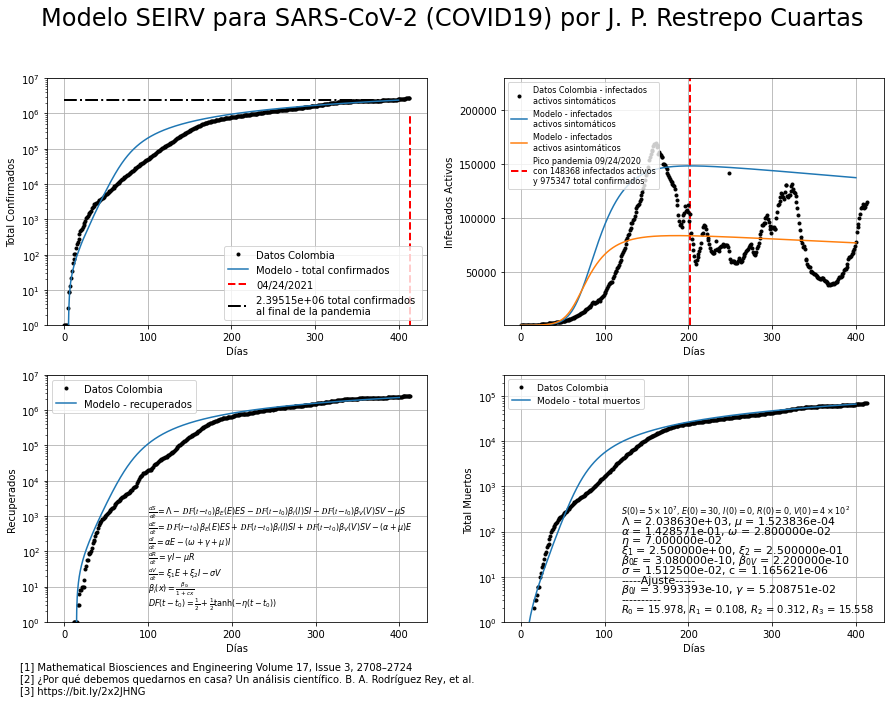

In [ ]:
# --- show ---
fig = plt.figure(figsize=(15,10))
fig.suptitle('Modelo SEIRV para SARS-CoV-2 (COVID19) por J. P. Restrepo Cuartas', fontsize=24)
fig.text(0.1,0.025,'[1] Mathematical Biosciences and Engineering Volume 17, Issue 3, 2708–2724 \
    \n[2] ¿Por qué debemos quedarnos en casa? Un análisis científico. B. A. Rodríguez Rey, et al. \
    \n[3] https://bit.ly/2x2JHNG ')
plt.subplot(221)
plt.plot(xtot[:],data1[:],'.k',x, totta)
plt.yscale("log")
plt.vlines(td,1,10**6,linestyles='--',colors='r',lw=2)
plt.hlines(finalmaxtot,0,xmaxd,linestyles='dashdot',lw=2)
#plt.vlines(40,1,1000000,linestyles='--',colors='b',lw=2)
plt.legend(("Datos "+ctry,'Modelo - total confirmados',dt1,'%g total confirmados \nal final de la pandemia'
            %(finalmaxtot.round()),"día ''smart''"),loc=0)
plt.xlabel("Días")
plt.ylabel("Total Confirmados")
plt.ylim(1,10**7)
plt.grid()
plt.subplot(222)
plt.plot(xtot[:], inf[:],'.k',x, po.model_sys(x, c)[:,2],'-',x, po.model_sys(x, c)[:,1],'-')
plt.vlines(numdatemax,1,1000000,linestyles='--',colors='r',lw=2)
#plt.vlines(40,1,1000000,linestyles='--',colors='b',lw=2)
plt.legend(("Datos "+ctry+' - infectados \nactivos sintomáticos','Modelo - infectados \nactivos sintomáticos',
            'Modelo - infectados \nactivos asintomáticos','Pico pandemia '+dt2+'\ncon %g infectados activos\ny %g total confirmados'
            %(maxinf.round(),maxtot.round())),loc='upper left',fontsize=8)
plt.xlabel("Días")
plt.ylabel("Infectados Activos")
plt.ylim(1,2.3*10**5)
plt.yscale("linear")
plt.grid()
plt.subplot(223)
plt.plot(xtot[:],rec[:],'.k',x, shift(po.model_sys(x, c)[:,3],shift1,cval=0))
plt.yscale("log")
plt.legend(("Datos "+ctry,'Modelo - recuperados'),loc='upper left')
plt.xlabel("Días")
plt.ylabel("Recuperados")
plt.text(xmaxd*0.25, np.exp(7), r'$\frac{dS}{dt} = \Lambda - 𝐷𝐹(𝑡−𝑡_0)\beta_E(E) E S - 𝐷𝐹(𝑡−𝑡_0)\beta_I(I) S I - 𝐷𝐹(𝑡−𝑡_0)\beta_V(V) S V - \mu S$',fontsize=8)
plt.text(xmaxd*0.25, np.exp(6), r'$\frac{dE}{dt} =  𝐷𝐹(𝑡−𝑡_0)\beta_E(E) E S + 𝐷𝐹(𝑡−𝑡_0)\beta_I(I) S I + 𝐷𝐹(𝑡−𝑡_0)\beta_V(V) S V - (\alpha + \mu) E $',fontsize=8)
plt.text(xmaxd*0.25, np.exp(5),r'$\frac{dI}{dt} = \alpha E - (\omega + \gamma + \mu) I $',fontsize=8)
plt.text(xmaxd*0.25, np.exp(4),r'$\frac{dR}{dt} = \gamma I - \mu R$',fontsize=8)
plt.text(xmaxd*0.25, np.exp(3),r'$\frac{dV}{dt} =\xi_1 E + \xi_2 I - \sigma V$',fontsize=8)
plt.text(xmaxd*0.25, np.exp(2),r'$ \beta_i(x) = \frac{\beta_{0i}}{1 + c x}  $',fontsize=8)
plt.text(xmaxd*0.25, np.exp(1),r'$DF(t-t_0)=\frac{1}{2}+\frac{1}{2}\tanh(-\eta(t-t_0))$',fontsize=8)
plt.ylim(1,10**7)
plt.grid()
plt.subplot(224)
plt.plot(xtot[:],deaths[:],'.k',x, po.omega*totta)
plt.yscale("log")
plt.legend(("Datos "+ctry,'Modelo - total muertos'),loc='upper left',fontsize=9)
plt.xlabel("Días")
plt.ylabel("Total Muertos ")
plt.text(xmaxd*0.3, np.exp(5.5), r'$S(0)=5\times10^7$, $E(0)=30$, $I(0)=0$, $R(0)=0$, $V(0)=4\times10^2$',fontsize=8)
plt.text(xmaxd*0.3, np.exp(5), r'$\Lambda$ = %e, $\mu$ = %e'%(po.lbd,po.mu),fontsize=11)
plt.text(xmaxd*0.3, np.exp(4.5), r'$\alpha$ = %e, $\omega$ = %e'%(po.alpha,po.omega),fontsize=11)
plt.text(xmaxd*0.3, np.exp(4), r'$\eta$ = %e'%(po.eta),fontsize=11)
plt.text(xmaxd*0.3, np.exp(3.5), r'$\xi_1$ = %e, $\xi_2$ = %e'%(po.xi_1,po.xi_2),fontsize=11)
plt.text(xmaxd*0.3, np.exp(3), r'$\beta_{0E}$ = %e, $\beta_{0V}$ = %e'%(po.b0[0],po.b0[1]),fontsize=11)
plt.text(xmaxd*0.3, np.exp(2.5), r'$\sigma$ = %e, c = %e'%(po.sigma, po.cc),fontsize=11)
plt.text(xmaxd*0.3, np.exp(2), r'-----Ajuste-----',fontsize=11)
plt.text(xmaxd*0.3, np.exp(1.5), r'$\beta_{0I}$ = %e, $\gamma$ = %e'%(c[0],c[1]),fontsize=11)
plt.text(xmaxd*0.3, np.exp(1), r'----------',fontsize=11)
plt.text(xmaxd*0.3, np.exp(0.5), r'$R_0$ = %0.3f, $R_1$ = %0.3f, $R_2$ = %0.3f, $R_3$ = %0.3f'%(R0,R1,R2,R3),fontsize=10)
plt.ylim(1,0.3*10**6)
plt.grid()
#plt.savefig('/content/drive/My Drive/SARSCoV2/modelosiervcovid19_'+dt3+'_jprestrepocuartas.pdf', format='pdf', dpi=1200)
plt.show()

In [ ]:
data1-shift(data1,1,cval=0)

3/6/20        1
3/7/20        0
3/8/20        0
3/9/20        0
3/10/20       2
           ... 
2/5/21     7248
2/6/21     8547
2/7/21     6009
2/8/21     4246
2/9/21     5442
Name: Colombia, Length: 341, dtype: int64

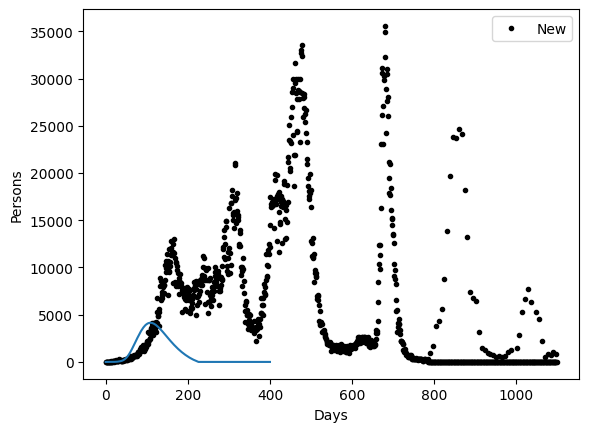

In [ ]:
plt.plot(xtot,data1-shift(data1,1,cval=0),'.k',x,  totta-shift(totta,1,cval=0),'-')
plt.legend(('New',),loc=0)
plt.xlabel("Days")
plt.ylabel("Persons")
plt.yscale("linear")
plt.show()

In [ ]:
x[13]

1.950975487743872